### Load The Data

In [1]:
#import the required packages
import numpy as np
import pandas as pd

In [2]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.metrics import accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import rcParams
from sklearn.decomposition import PCA
from scipy import stats
import seaborn as sb
%matplotlib inline
from sklearn.feature_selection import VarianceThreshold
from sklearn.metrics import mean_squared_error
import math

In [3]:
#import the dataset
data = pd.read_csv('cellPhonePrice_data.csv')

In [4]:
#dataset
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


### Problem : Cell Phone Price Pridiction is Classification Problem

### Exploratory Data Analysis 

In [5]:
# Columns in dataset
data.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

- All Columns in dataset

In [6]:
# data shape
data.shape

(2000, 21)

- Shape of Data

In [7]:
# some imp values for all features
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [8]:
# information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

- All the values in dataset are Numerical type 

In [9]:
# counter for target (price range)
Counter(data.price_range)

Counter({1: 500, 2: 500, 3: 500, 0: 500})

- No of Values of Dependent Variable

In [10]:
# chack nan values
np.nan == True

False

In [11]:
# chack for null values
data.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

- Zero NaN Values Present in Dataset

In [12]:
# sum of duplicate data
data.duplicated().sum()

0

- Zero Duplicate Values Present in Dataset

In [13]:
# chack duplicate data
data.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
1995    False
1996    False
1997    False
1998    False
1999    False
Length: 2000, dtype: bool

In [14]:
#rename the columns of data
data.rename(columns={'battery_power':'battery_power', 'blue':'bluetooth', 'clock_speed':'clock_speed', 'dual_sim':'dual_sim', 'fc':'front_camera', 'four_g':'4g',
       'int_memory':'internal_memory', 'm_dep':'mobile_depth', 'mobile_wt':'mobile_weight', 'n_cores':'no_cores_processor', 'pc':'primary_camera', 'px_height':'pixel_height_resolution',
       'px_width':'pixel_width_resolution', 'ram':'ram', 'sc_h':'screen_height', 'sc_w':'screen_width', 'talk_time':'battery_talk_time', 'three_g':'3g',
       'touch_screen':'touch_screen', 'wifi':'wifi', 'price_range':'price_range'},inplace=True)
    

In [15]:
# data with rename columns
data

,battery_power,bluetooth,clock_speed,dual_sim,front_camera,4g,internal_memory,mobile_depth,mobile_weight,no_cores_processor,...,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,battery_talk_time,3g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,...,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,...,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,...,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,...,336,670,869,18,10,19,1,1,1,0


- Succesfully Renamed the dataset

### Data Visualization

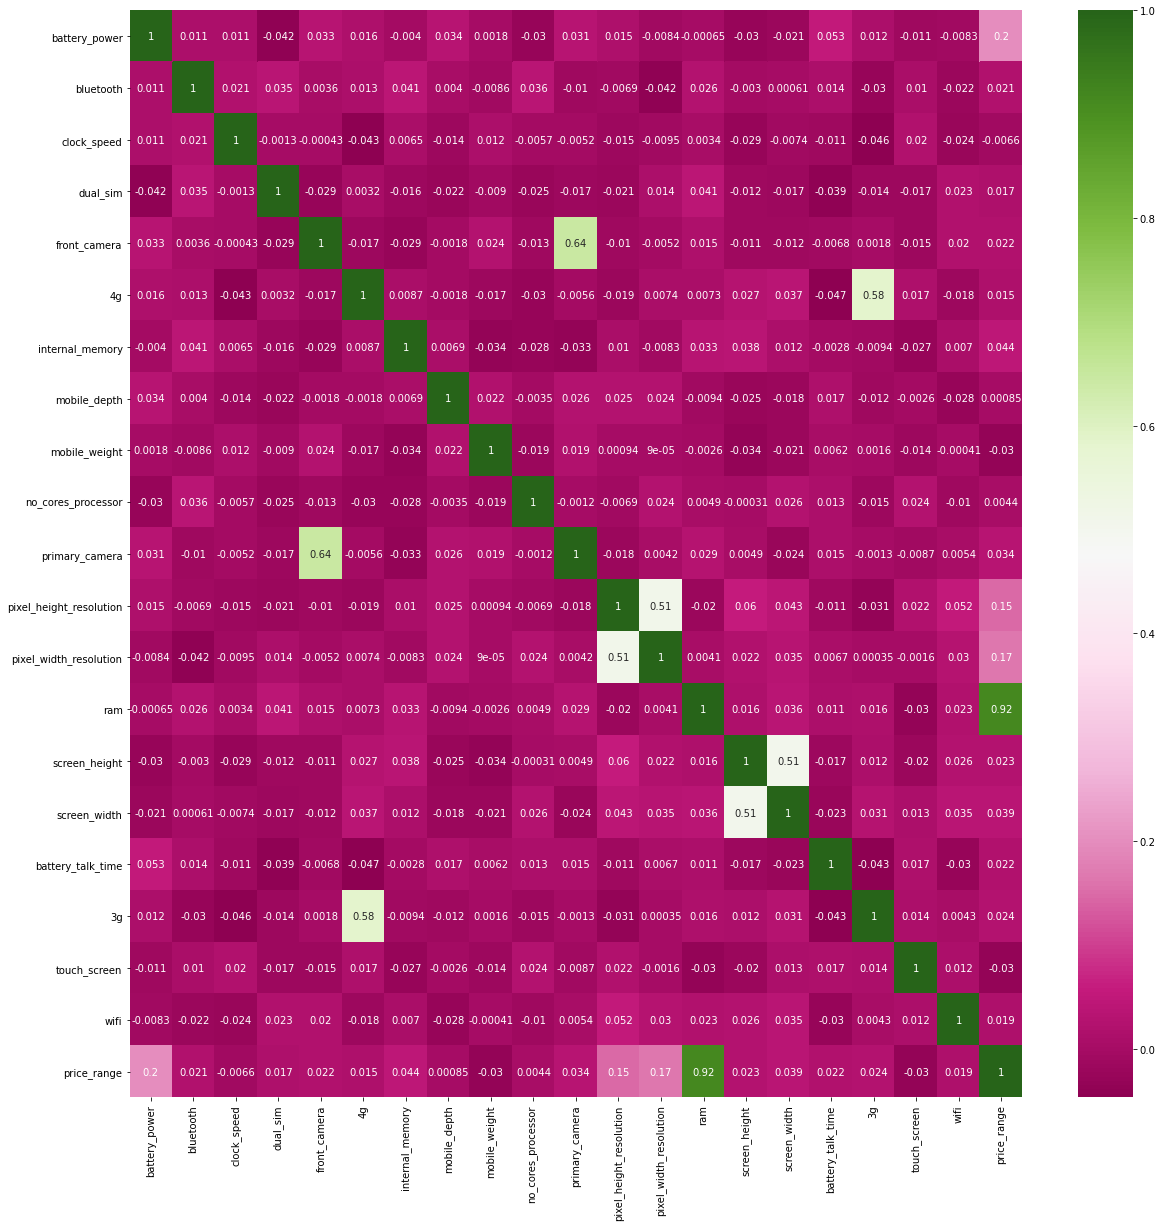

In [16]:
#get correlations of each features in dataset
corr = data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(20,20))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="PiYG")

- bettery_power, pixel_height_resolution, pixel_width_resolution and ram are highly correlated with price_range
- front_cemara,4g,internal_memory,no_cores_processor,primary_cemara also imp features

F:\Anaconda\anaconda setup\lib\site-packages\seaborn\categorical.py:3692: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


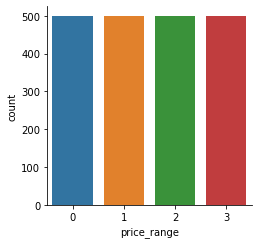

In [17]:
# Checking values for target
sb.catplot('price_range',data=data,kind='count',size = 3.5)

- In terms of class balance, we say that the target(price_range) has balanced classes

### Data Cleaning and Preprocessing:

##### 1. Impuating missing values 

In [18]:
# check missing values 
data.isnull().sum().sum()

0

- Zero Missing Values found in this dataset

##### 2. Converting Categorical Features into Numerical

In [19]:
# check for categorical variable
data_cat = data.select_dtypes(include='object')
data_cat.head()

""
0
1
2
3
4


- Categorical features are not present in this dataset

##### 3. Replacing NaN Values With Mean

- Since Zero NaN Values Found in this dataset,
- No Need of any Replacement

##### 4. Check Outlier

In [20]:
# Calculating z_score
z_score=np.abs(stats.zscore(data))
print(z_score)

[[0.90259726 0.9900495  0.83077942 ... 1.00601811 0.98609664 0.4472136 ]
 [0.49513857 1.0100505  1.2530642  ... 0.99401789 1.01409939 0.4472136 ]
 [1.5376865  1.0100505  1.2530642  ... 0.99401789 1.01409939 0.4472136 ]
 ...
 [1.53077336 0.9900495  0.76274805 ... 0.99401789 1.01409939 1.34164079]
 [0.62252745 0.9900495  0.76274805 ... 0.99401789 0.98609664 1.34164079]
 [1.65833069 1.0100505  0.58562134 ... 0.99401789 0.98609664 1.34164079]]


In [21]:
# Set threshold
threshold=3

In [22]:
# Detecting Outliers
out = np.where(z_score > threshold)
out

(array([  95,  226,  305, 1387, 1406, 1416, 1554, 1693, 1705, 1880, 1882,
        1888], dtype=int64),
 array([4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4], dtype=int64))

In [23]:
# Create dataframe for Outliers 
outlier = pd.DataFrame(out).T
outlier.columns = ['Row','Column']

In [24]:
# Outliers Dataframe
outlier

,Row,Column
0,95,4
1,226,4
2,305,4
3,1387,4
4,1406,4
5,1416,4
6,1554,4
7,1693,4
8,1705,4
9,1880,4


In [25]:
# columns in dataset which contains outliers
outlier.Column.value_counts()

4    12
Name: Column, dtype: int64

- Outliers are present at 4 column = 'front_camera'

In [26]:
# Check Z score and Outlier values for 'front_camera'
print(data.front_camera.value_counts())
print(data.front_camera.mean())
print(data.front_camera.std())

0     474
1     245
2     189
3     170
5     139
4     133
6     112
7     100
9      78
8      77
10     62
11     51
12     45
13     40
16     24
15     23
14     20
18     11
17      6
19      1
Name: front_camera, dtype: int64
4.3095
4.341443747983884


In [27]:
fc = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]
fc_outlier = []
for i in fc:
    z = (i-4.3095)/4.341443747983884
    print(z)
    if (z>3 or -(1*z)>3):
        fc_outlier.append(i)
print(fc_outlier)

-0.9926421370773909
-0.7623040150035097
-0.5319658929296286
-0.3016277708557474
-0.0712896487818662
0.15904847329201496
0.38938659536589615
0.6197247174397773
0.8500628395136585
1.0804009615875396
1.3107390836614208
1.541077205735302
1.771415327809183
2.0017534498830645
2.2320915719569454
2.462429694030827
2.6927678161047077
2.923105938178589
3.15344406025247
3.3837821823263514
[18, 19]


- Outliers are present in front_camera at values = 18,19

In [28]:
# Replacing Outliers with Mean values
data["front_camera"] = np.where(data["front_camera"] == 18, 4.3095,data['front_camera'])
data["front_camera"] = np.where(data["front_camera"] == 19, 4.3095,data['front_camera'])

In [29]:
print(data.iloc[95,4])
print(data.iloc[1705,4])
print(data.iloc[95,4])
print(data.iloc[226,4])
print(data.iloc[305,4])
print(data.iloc[1387,4])
print(data.iloc[1406,4])
print(data.iloc[1416,4])
print(data.iloc[1554,4])
print(data.iloc[1693,4])
print(data.iloc[1705,4])
print(data.iloc[1880,4])
print(data.iloc[1882,4])
print(data.iloc[1888,4])
print(data.iloc[1888,4])

4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095
4.3095


- Succesfully replaced Outliers with Mean values 

### 5. Features Engg.

##### 5.1. Feature Selection 

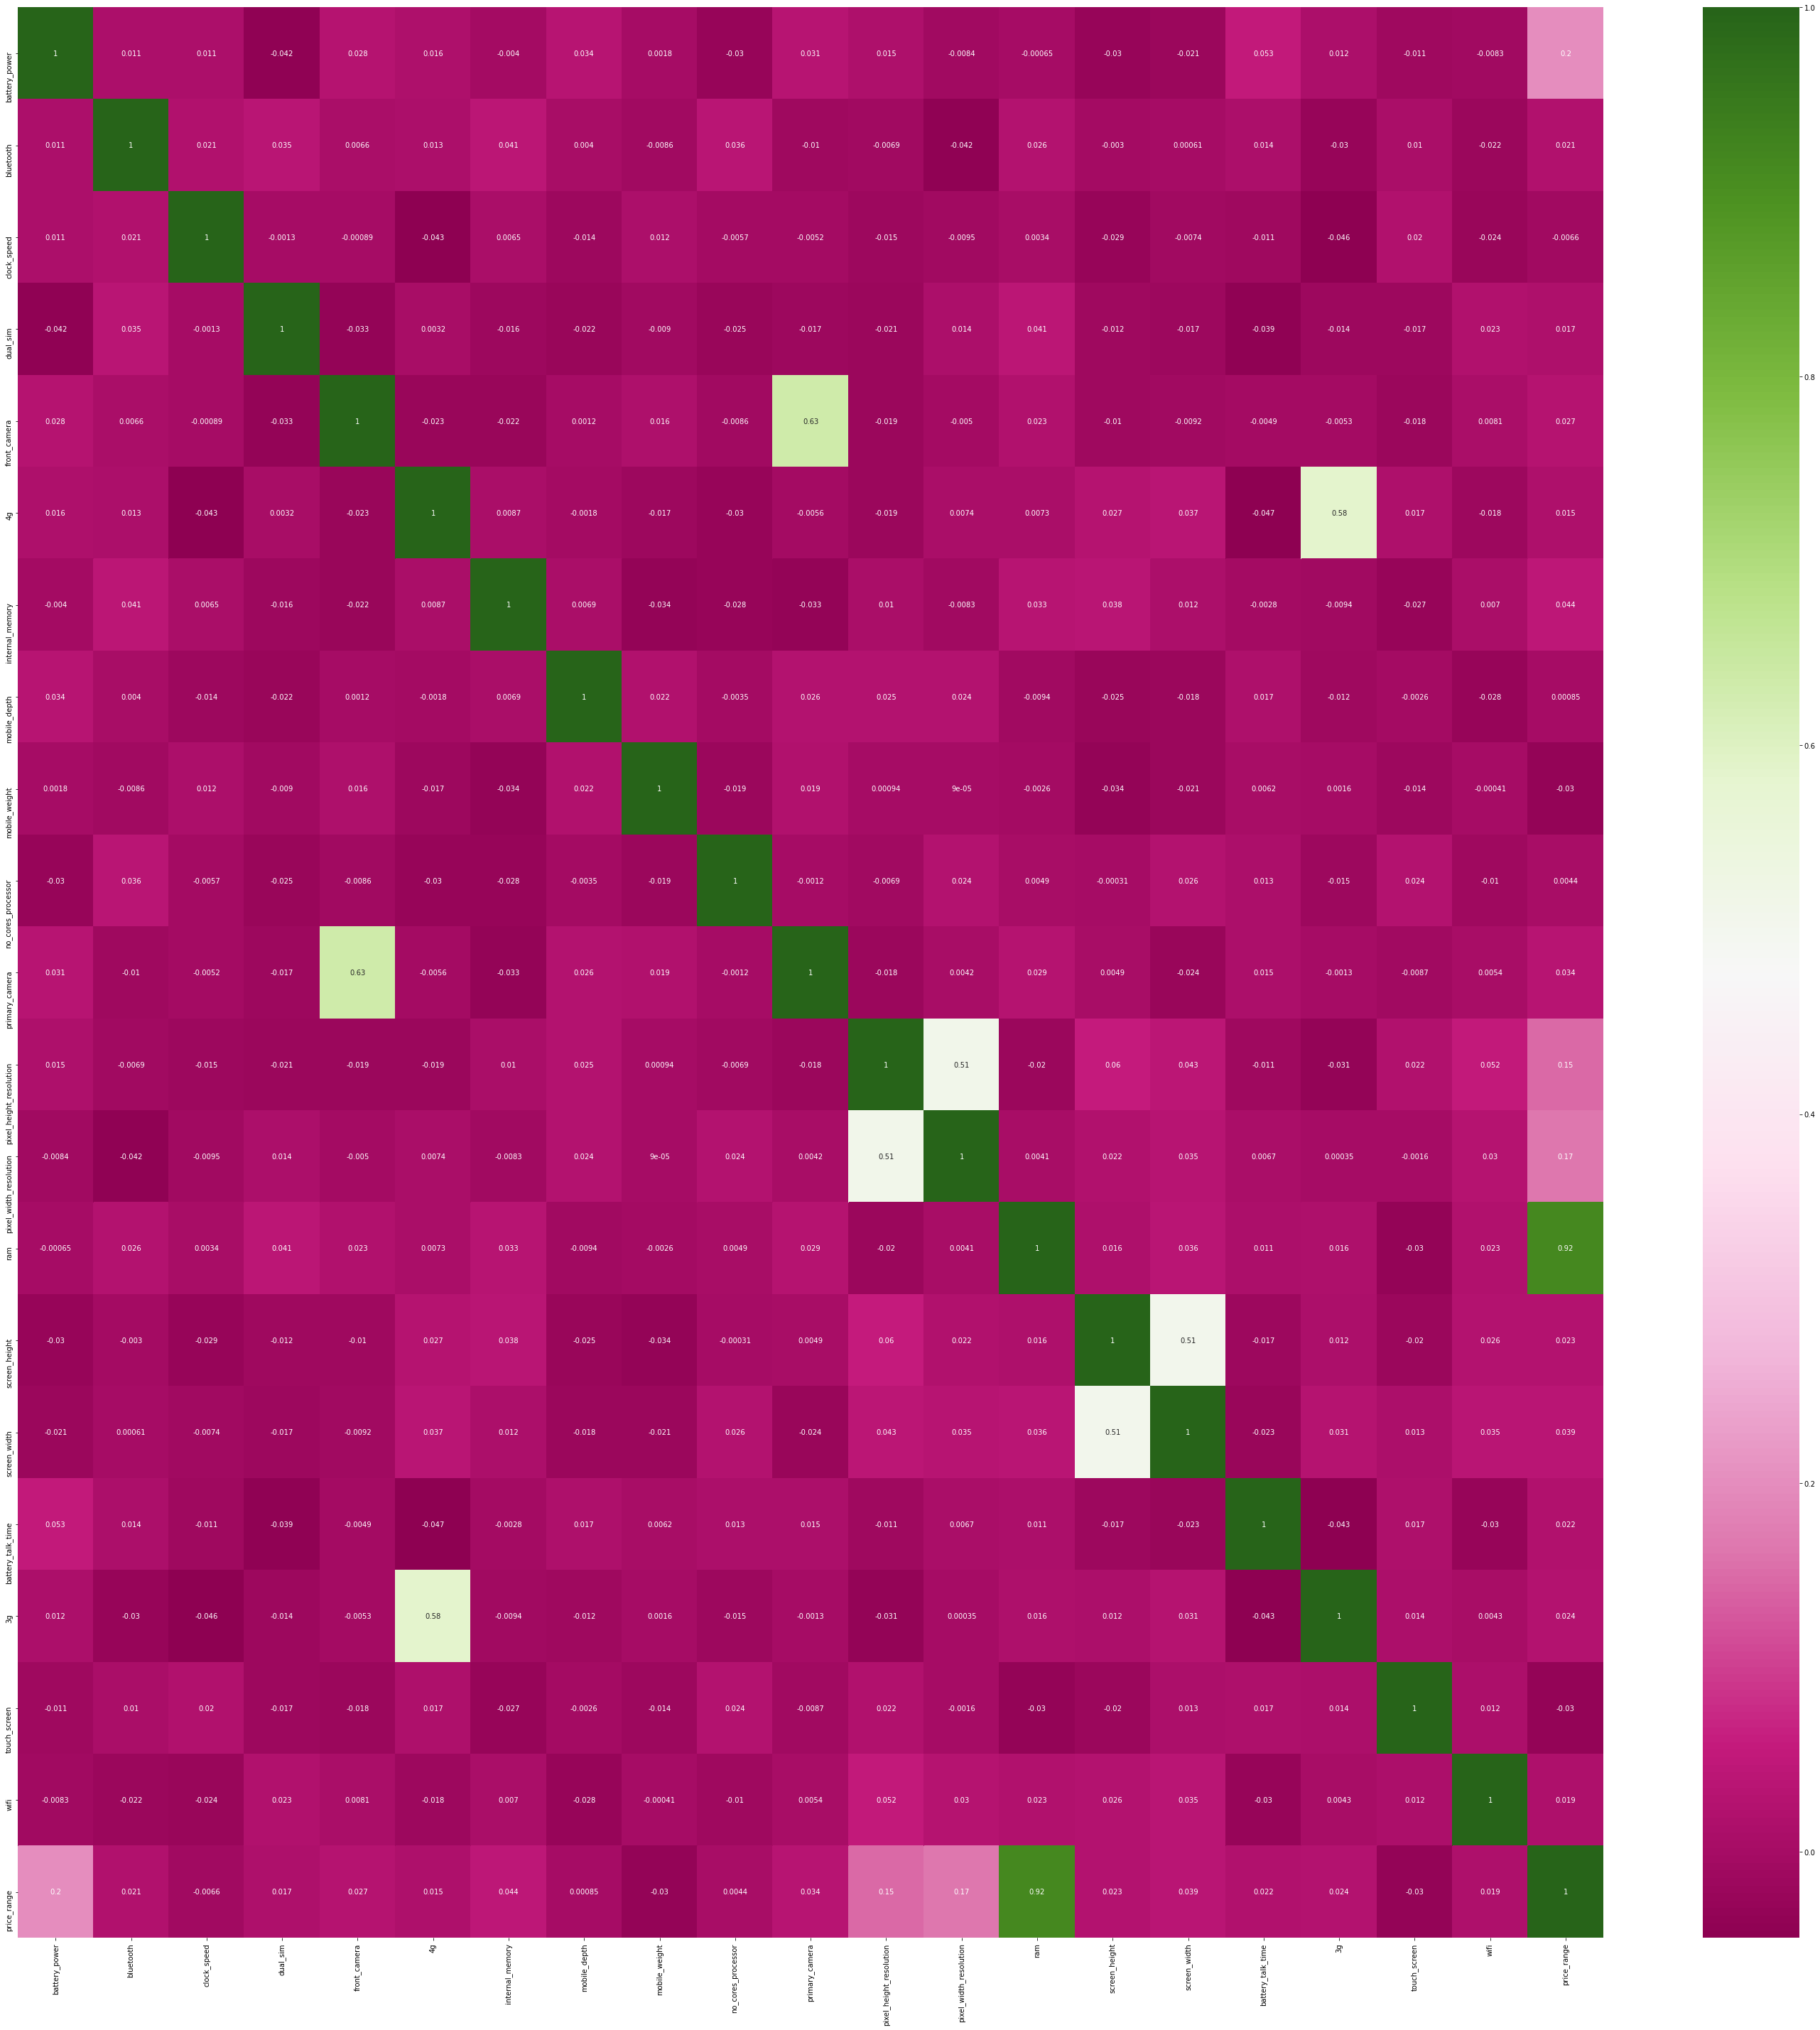

In [30]:
#pearson correlation
corr = data.corr(method='pearson')
top_corr_features = corr.index
plt.figure(figsize=(50,50))
#plot heat map
g=sb.heatmap(data[top_corr_features].corr(),annot=True,cmap="PiYG")

##### 2.2. Feature importance :

[0.06181527 0.02070482 0.03372264 0.01978772 0.0339105  0.01797317
 0.03560545 0.0329893  0.03588343 0.03279745 0.03305706 0.04772162
 0.04777048 0.38978001 0.03355036 0.03426646 0.03488422 0.01459713
 0.01933608 0.0198468 ]


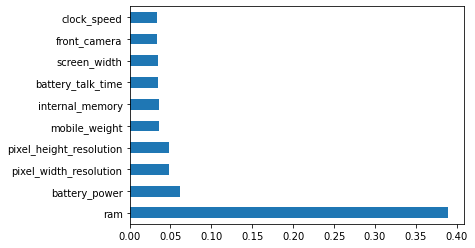

In [31]:
X = data.iloc[:,:-1]  #independent columns
y = data["price_range"]    #target column 
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [32]:
data.columns

Index(['battery_power', 'bluetooth', 'clock_speed', 'dual_sim', 'front_camera',
       '4g', 'internal_memory', 'mobile_depth', 'mobile_weight',
       'no_cores_processor', 'primary_camera', 'pixel_height_resolution',
       'pixel_width_resolution', 'ram', 'screen_height', 'screen_width',
       'battery_talk_time', '3g', 'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [33]:
# remove less correlated features
data.drop(['bluetooth','clock_speed','dual_sim','mobile_depth','battery_talk_time','3g','touch_screen', 'wifi',],
              axis = 1, inplace= True) 

In [34]:
data.head(5)

,battery_power,front_camera,4g,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,price_range
0,842,1.0,0,7,188,2,2,20,756,2549,9,7,1
1,1021,0.0,1,53,136,3,6,905,1988,2631,17,3,2
2,563,2.0,1,41,145,5,6,1263,1716,2603,11,2,2
3,615,0.0,0,10,131,6,9,1216,1786,2769,16,8,2
4,1821,13.0,1,44,141,2,14,1208,1212,1411,8,2,1


### Feature Scaling

##### Check Distribution : Noramlization

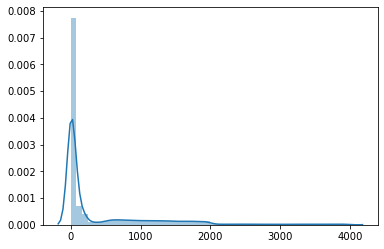

In [35]:
# seaborn displot foe data
sb.distplot(data)

In [36]:
# Skewnwss for dataset
skew = stats.skew(data)
skew

array([ 0.03187454,  0.96762064, -0.08607962,  0.0578459 ,  0.00655324,
        0.00362479,  0.01729317,  0.66577145,  0.01477638,  0.00662306,
       -0.09881006,  0.63331163,  0.        ])

In [37]:
# Kurtosis  for dataset
kurto = stats.kurtosis(data)
kurto

array([-1.22408417,  0.0931328 , -1.9925903 , -1.21603447, -1.21035115,
       -1.22967604, -1.1715706 , -0.31807488, -1.18604079, -1.19193387,
       -1.19081485, -0.39154816, -1.36      ])

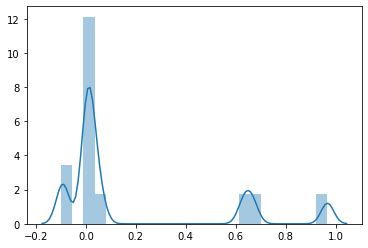

In [38]:
# seaborn plot for skewness for clean data 
sb.distplot(skew)

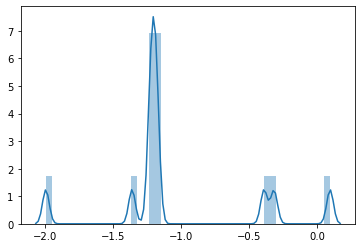

In [39]:
# seaborn plot for kurtosis for clean data
sb.distplot(kurto)

- After Visualize above Plots, The Dataset Is Evenly Distributed

### Defining X and Y

In [40]:
X=data.iloc[:,:-1]
X.head()

,battery_power,front_camera,4g,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width
0,842,1.0,0,7,188,2,2,20,756,2549,9,7
1,1021,0.0,1,53,136,3,6,905,1988,2631,17,3
2,563,2.0,1,41,145,5,6,1263,1716,2603,11,2
3,615,0.0,0,10,131,6,9,1216,1786,2769,16,8
4,1821,13.0,1,44,141,2,14,1208,1212,1411,8,2


In [41]:
y=data.price_range
y.head()

0    1
1    2
2    2
3    2
4    1
Name: price_range, dtype: int64

### Splitting the data

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=10)

In [43]:
X_train

,battery_power,front_camera,4g,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width
1443,1180,0.0,1,27,90,6,1,168,540,348,7,5
1126,635,1.0,1,50,97,5,13,193,989,2107,13,12
729,1135,9.0,0,43,158,1,11,690,1589,3204,18,13
1094,688,0.0,0,2,89,3,2,271,869,391,5,2
73,1038,3.0,0,43,141,1,5,4,638,3709,11,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1393,1444,0.0,0,6,103,1,1,1274,1340,712,17,5
1344,1429,8.0,0,42,151,5,9,670,1552,1817,6,1
527,1780,6.0,0,27,190,4,11,1331,1463,2776,19,17
1149,1396,0.0,1,44,118,6,1,173,1843,1386,7,1


In [44]:
X_test

,battery_power,front_camera,4g,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width
115,1900,1.0,1,18,89,7,9,1055,1661,2871,12,1
1779,1807,0.0,0,16,125,3,0,1221,1415,2921,8,5
1449,602,9.0,0,50,141,8,18,1571,1717,2189,7,5
145,1814,1.0,1,9,141,2,2,756,786,3556,18,12
1009,1881,4.0,0,51,158,5,7,477,1553,1229,12,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1040,1154,12.0,1,14,156,7,14,251,1801,587,8,3
870,1673,7.0,0,9,187,3,10,65,734,3669,9,1
1827,1692,4.0,1,2,106,1,17,1899,1904,3779,9,3
1533,642,0.0,1,38,86,5,10,887,1775,435,9,2


In [45]:
y_train

1443    0
1126    1
729     3
1094    0
73      3
       ..
1393    0
1344    1
527     3
1149    1
1289    1
Name: price_range, Length: 1400, dtype: int64

In [46]:
y_test

115     3
1779    3
1449    2
145     3
1009    1
       ..
1040    0
870     3
1827    3
1533    0
1590    3
Name: price_range, Length: 600, dtype: int64

In [47]:
print("X_train shape", X_train.shape)
print("X_test shape", X_test.shape)
print("y_train shape", y_train.shape)
print("y_test shape", y_test.shape)

X_train shape (1400, 12)
X_test shape (600, 12)
y_train shape (1400,)
y_test shape (600,)


### Hyporthesis Data Tuning Using GridSeachCV

In [48]:
from sklearn.model_selection import GridSearchCV

In [49]:
#Choosing a K Value in KNN for price_range:
error_rate = [] 
for i in range(1, 40): 
      
    knn = KNeighborsClassifier(n_neighbors = i) 
    knn.fit(X_train, y_train) 
    knn.score(X_train,y_train)
    predict_i = knn.predict(X_test) 
    error_rate.append(np.mean(predict_i != y_test)) 
  

Text(0, 0.5, 'Error Rate')

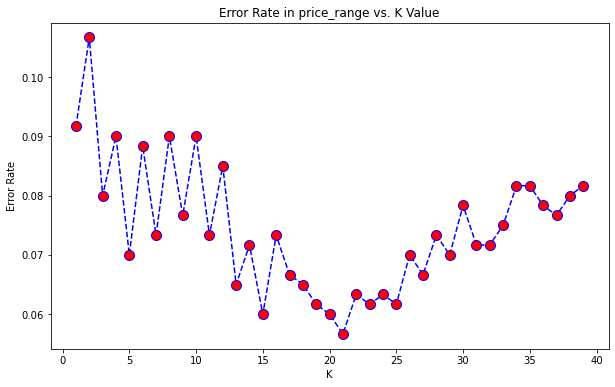

In [50]:
plt.figure(figsize =(10, 6)) 
plt.plot(range(1, 40), error_rate, color ='blue', 
                linestyle ='dashed', marker ='o', 
         markerfacecolor ='red', markersize = 10) 
  
plt.title('Error Rate in price_range vs. K Value') 
plt.xlabel('K') 
plt.ylabel('Error Rate')

In [51]:
#data tuning
model = KNeighborsClassifier()
parameters = {'algorithm':['auto'],
                  'leaf_size':[10,15,20,25],
                  'metric':['minkowski'],
                  'metric_params':[None],
                  'n_jobs':[1,3,5],
                  'n_neighbors':[15,18,21,25],
                  'p':[1,2],
                  'weights':['uniform']}

In [52]:
knn_grid = GridSearchCV(model,
                          parameters,
                          cv = 2,
                          verbose=True)

In [53]:
# model fitting
knn_grid.fit(X_train,y_train)

Fitting 2 folds for each of 96 candidates, totalling 192 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 192 out of 192 | elapsed:   27.2s finished


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto'], 'leaf_size': [10, 15, 20, 25],
                         'metric': ['minkowski'], 'metric_params': [None],
                         'n_jobs': [1, 3, 5], 'n_neighbors': [15, 18, 21, 25],
                         'p': [1, 2], 'weights': ['uniform']},
             verbose=True)

In [54]:
# best score
knn_grid.best_score_

0.9157142857142857

In [55]:
#best parameters
knn_grid.best_params_

{'algorithm': 'auto',
 'leaf_size': 10,
 'metric': 'minkowski',
 'metric_params': None,
 'n_jobs': 1,
 'n_neighbors': 15,
 'p': 1,
 'weights': 'uniform'}

### Creating & Training Model

In [56]:
#creating model
model_knn = KNeighborsClassifier(algorithm='auto',
                                 leaf_size=10,
                                 metric='minkowski',
                                 metric_params=None,
                                 n_jobs=1,
                                 n_neighbors=15,
                                 p=1,
                                 weights='uniform')

In [57]:
#fitting model
model_knn.fit(X_train,y_train)

KNeighborsClassifier(leaf_size=10, n_jobs=1, n_neighbors=15, p=1)

In [58]:
model_knn.score(X_train,y_train)

0.94

In [59]:
# accuracy score
y_predict = model_knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.925

### PCA

In [60]:
# transform and fit X into datafram df2
pca = PCA(n_components=3)
df = pd.DataFrame(pca.fit_transform(X))
df.head()

,0,1,2
0,430.596583,-795.787979,-390.075359
1,504.984842,696.622448,-235.626260
2,473.329884,763.942172,-680.058098
3,639.822214,779.691385,-630.783541
4,-718.985143,382.304297,591.037365


In [61]:
data.shape

(2000, 13)

In [62]:
#shape of df
df.shape

(2000, 3)

In [63]:
data

,battery_power,front_camera,4g,internal_memory,mobile_weight,no_cores_processor,primary_camera,pixel_height_resolution,pixel_width_resolution,ram,screen_height,screen_width,price_range
0,842,1.0,0,7,188,2,2,20,756,2549,9,7,1
1,1021,0.0,1,53,136,3,6,905,1988,2631,17,3,2
2,563,2.0,1,41,145,5,6,1263,1716,2603,11,2,2
3,615,0.0,0,10,131,6,9,1216,1786,2769,16,8,2
4,1821,13.0,1,44,141,2,14,1208,1212,1411,8,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,0.0,1,2,106,6,14,1222,1890,668,13,4,0
1996,1965,0.0,0,39,187,4,3,915,1965,2032,11,10,2
1997,1911,1.0,1,36,108,8,3,868,1632,3057,9,1,3
1998,1512,4.0,1,46,145,5,5,336,670,869,18,10,0


In [64]:
df

,0,1,2
0,430.596583,-795.787979,-390.075359
1,504.984842,696.622448,-235.626260
2,473.329884,763.942172,-680.058098
3,639.822214,779.691385,-630.783541
4,-718.985143,382.304297,591.037365
...,...,...,...
1995,-1461.096715,843.813454,-456.019474
1996,-94.446176,693.938094,708.382367
1997,930.669515,436.671454,664.300539
1998,-1252.738037,-629.883987,285.781340


In [65]:
# calculating variance ratio
var=pca.explained_variance_ratio_
var

array([0.67045199, 0.16518223, 0.11006361])

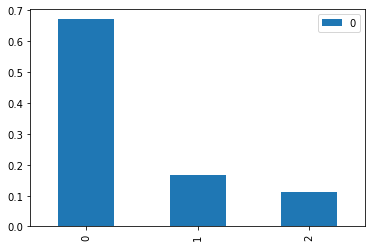

In [66]:
# ploting variance ratio
cell_var = pd.DataFrame(var)
cell_var.plot(kind='bar')

In [67]:
price_data = df.iloc[:,:]
price_data.head(2)

,0,1,2
0,430.596583,-795.787979,-390.075359
1,504.984842,696.622448,-235.626260


In [68]:
# spliting, training and fitting model after pca
price_data_train, price_data_test, y_train, y_test=train_test_split(X,y,test_size=0.3,random_state=10)

model_pca = KNeighborsClassifier(algorithm='auto',
                               leaf_size=10,
                               metric='minkowski',
                               metric_params=None,
                               n_jobs=1,
                               n_neighbors=15,
                               p=1,
                               weights='uniform')
model_pca.fit(price_data_train,y_train)
model_pca.score(price_data_train,y_train)
y_predict_pca = model_pca.predict(price_data_test)
print(accuracy_score(y_test,y_predict_pca))

0.925


Text(0, 0.5, 'Second Principal comaponent')

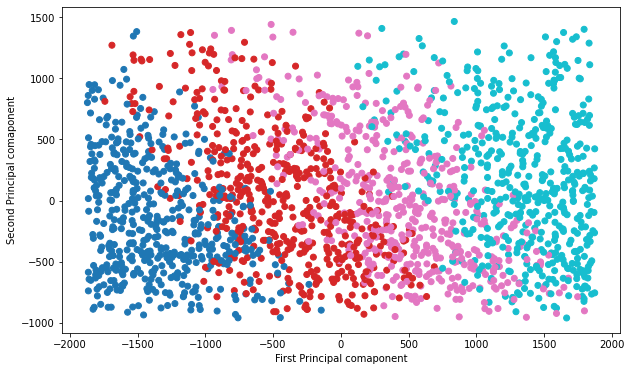

In [69]:
#scatter() : 1. shows the data as a collection of points. 
#            2. plot graph based on target variable
plt.figure(figsize=(10,6))
plt.scatter(x=price_data.iloc[:,0],
            y=price_data.iloc[:,1],
            c=data['price_range'],
            cmap='tab10'
           )
plt.xlabel("First Principal comaponent")
plt.ylabel("Second Principal comaponent")

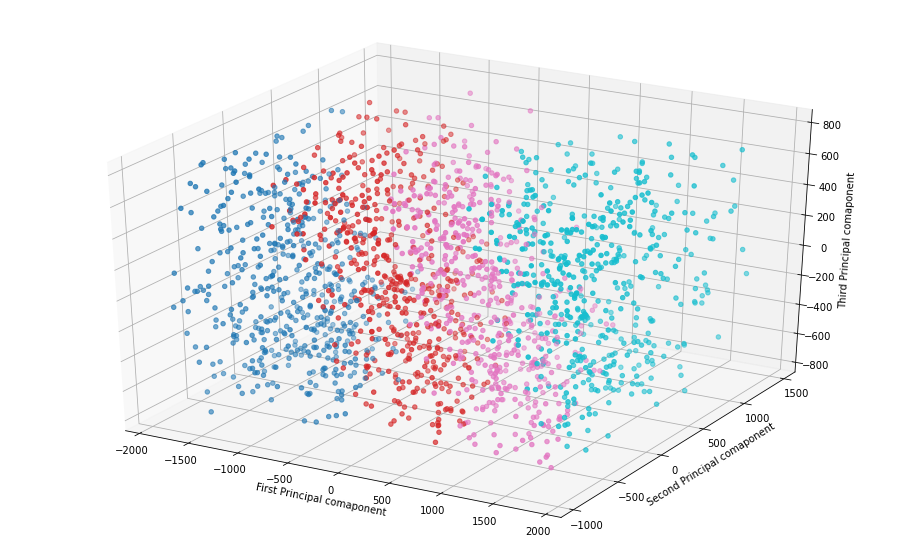

In [70]:
ax = plt.figure(figsize=(16,10)).gca(projection='3d')
ax.scatter(
    xs=price_data.iloc[:,0], 
    ys=price_data.iloc[:,1], 
    zs=price_data.iloc[:,2], 
    c=data['price_range'], 
    cmap='tab10'
)
ax.set_xlabel('First Principal comaponent')
ax.set_ylabel('Second Principal comaponent')
ax.set_zlabel('Third Principal comaponent')
plt.show()


In [71]:
pca.components_

array([[-3.47204248e-04,  8.82003341e-05,  3.40463491e-06,
         5.48237527e-04, -8.44349099e-05,  1.03535472e-05,
         1.62420551e-04, -9.90307423e-03,  9.64774328e-04,
         9.99950255e-01,  6.12371587e-05,  1.42225220e-04],
       [ 1.03884185e-02, -1.05725960e-04, -6.63423402e-06,
         6.84762152e-05,  3.91158863e-05,  3.92450027e-05,
        -9.08858691e-05,  7.25036151e-01,  6.88601377e-01,
         6.51958781e-03,  3.71862729e-04,  3.65603450e-04],
       [ 9.99442706e-01,  2.62850761e-04,  1.72371529e-05,
        -1.47285624e-04,  1.50059442e-04, -1.58884260e-04,
         4.28687140e-04,  1.43077004e-02, -3.01471126e-02,
         5.17862209e-04, -2.84685516e-04, -2.15773050e-04]])

### RESULT :
1. Accuracy Score
2. Confusion Matrix
3. Error
4. Precision
5. Recall
6. F1 Score
7. Evaluating Precision, recall,F1 score matrix
8. Roc Auc Score & Curve


##### 1. Accuracy Score

In [72]:
# acuracy score
accuracy_score(y_test,y_predict_pca)

0.925

##### 2. Confusion Matrix

In [73]:
print(Counter(y_test))
pd.crosstab(y_test,y_predict_pca)

Counter({2: 157, 1: 157, 3: 146, 0: 140})


col_0,0,1,2,3
price_range,,,,
0,137,3,0,0
1,9,146,2,0
2,0,12,136,9
3,0,0,10,136


In [74]:
confusion_matrix(y_test,y_predict_pca)

array([[137,   3,   0,   0],
       [  9, 146,   2,   0],
       [  0,  12, 136,   9],
       [  0,   0,  10, 136]], dtype=int64)

##### 3. Error

In [75]:
# errrors
print(mean_squared_error(y_test,y_predict_pca))
print(math.sqrt(mean_squared_error(y_test,y_predict_pca)))

0.075
0.27386127875258304


##### 4. Precision

In [76]:
from sklearn.metrics import precision_score, recall_score, f1_score, classification_report
# Precision 
print('Precision: %.3f' % precision_score(y_test,y_predict_pca, average='micro'))

Precision: 0.925


##### 5. Recall

In [77]:
# Recall
print('Recall: %.3f' % recall_score(y_test,y_predict_pca, average='micro'))

Recall: 0.925


##### 6. F1 Score

In [78]:
# F1_score
print('F1_score: %.3f' % f1_score(y_test,y_predict_pca, average='micro'))

F1_score: 0.925


##### 7. Evaluating Precision, recall,F1 score matrix

In [79]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_predict_pca))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       140
           1       0.91      0.93      0.92       157
           2       0.92      0.87      0.89       157
           3       0.94      0.93      0.93       146

    accuracy                           0.93       600
   macro avg       0.93      0.93      0.93       600
weighted avg       0.92      0.93      0.92       600



#### 8.Roc Auc Score & Curve

In [80]:
model_pca.predict(price_data_test)

array([3, 3, 2, 3, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 0, 3, 2, 3, 2, 2, 3, 2,
       0, 1, 0, 0, 2, 3, 1, 1, 2, 0, 3, 2, 2, 2, 1, 0, 2, 0, 3, 2, 2, 0,
       0, 3, 1, 0, 1, 2, 1, 3, 2, 2, 3, 3, 2, 3, 0, 0, 1, 1, 0, 0, 2, 0,
       2, 1, 1, 3, 2, 2, 1, 1, 3, 1, 3, 3, 2, 1, 2, 0, 0, 0, 0, 3, 2, 3,
       3, 3, 2, 3, 3, 3, 3, 1, 0, 1, 1, 1, 3, 0, 1, 1, 1, 3, 2, 1, 2, 2,
       1, 0, 3, 1, 2, 1, 1, 1, 3, 0, 1, 0, 3, 2, 1, 3, 0, 3, 2, 0, 3, 3,
       3, 1, 2, 0, 0, 2, 3, 1, 3, 0, 3, 2, 0, 3, 3, 1, 2, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 3, 1, 1, 2, 3, 2, 2, 2, 0, 1, 2, 1, 3, 3, 3, 3, 0, 2,
       3, 2, 2, 2, 1, 2, 2, 2, 3, 0, 2, 2, 0, 2, 0, 2, 1, 3, 2, 0, 0, 0,
       0, 3, 1, 3, 3, 3, 2, 1, 1, 2, 2, 1, 2, 1, 1, 3, 3, 1, 3, 1, 3, 1,
       3, 2, 0, 3, 0, 0, 2, 2, 1, 1, 1, 1, 0, 3, 0, 1, 0, 2, 0, 3, 1, 2,
       0, 1, 1, 2, 2, 3, 0, 3, 1, 1, 0, 3, 2, 1, 2, 1, 0, 3, 3, 1, 1, 1,
       3, 2, 3, 0, 2, 2, 2, 2, 0, 3, 0, 3, 1, 1, 2, 0, 3, 3, 0, 1, 1, 1,
       3, 0, 0, 1, 1, 0, 2, 3, 2, 1, 3, 0, 0, 3, 1,

In [81]:
model_pca.predict_proba(price_data_test)

array([[0. , 0. , 0. , 1. ],
       [0. , 0. , 0. , 1. ],
       [0. , 0.2, 0.8, 0. ],
       ...,
       [0. , 0. , 0. , 1. ],
       [1. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 1. ]])

In [82]:
y_predict_th2 = np.where(model_pca.predict_proba(price_data_test)[:,1]>0.2,1,0) # Threshold is 0.2
y_predict_th3 = np.where(model_pca.predict_proba(price_data_test)[:,1]>0.3,1,0) # Threshold is 0.3
y_predict_th4 = np.where(model_pca.predict_proba(price_data_test)[:,1]>0.4,1,0) # Threshold is 0.4

In [83]:
pd.crosstab(y_test,y_predict_th4)

col_0,0,1
price_range,,
0,137,3
1,6,151
2,140,17
3,146,0


In [84]:
def predict_threshold (model_pca,price_data_test,thresholds):
    import numpy as np
    return np.where(model_pca.predict_proba(price_data_test)[:,1]>thresholds,1,0) # Threshold is 0.3

In [85]:
# thresholds
for thr in np.arange(0,1.1,0.1):
    y_predict = predict_threshold(model_pca,price_data_test,thr)
    print("Threshold :",thr)
    print(confusion_matrix(y_test,y_predict))

Threshold : 0.0
[[ 88  52   0   0]
 [  0 157   0   0]
 [ 87  70   0   0]
 [146   0   0   0]]
Threshold : 0.1
[[100  40   0   0]
 [  0 157   0   0]
 [ 99  58   0   0]
 [146   0   0   0]]
Threshold : 0.2
[[119  21   0   0]
 [  1 156   0   0]
 [117  40   0   0]
 [146   0   0   0]]
Threshold : 0.30000000000000004
[[125  15   0   0]
 [  1 156   0   0]
 [123  34   0   0]
 [146   0   0   0]]
Threshold : 0.4
[[137   3   0   0]
 [  6 151   0   0]
 [140  17   0   0]
 [146   0   0   0]]
Threshold : 0.5
[[137   3   0   0]
 [ 11 146   0   0]
 [145  12   0   0]
 [146   0   0   0]]
Threshold : 0.6000000000000001
[[139   1   0   0]
 [ 30 127   0   0]
 [154   3   0   0]
 [146   0   0   0]]
Threshold : 0.7000000000000001
[[140   0   0   0]
 [ 42 115   0   0]
 [155   2   0   0]
 [146   0   0   0]]
Threshold : 0.8
[[140   0   0   0]
 [ 72  85   0   0]
 [157   0   0   0]
 [146   0   0   0]]
Threshold : 0.9
[[140   0   0   0]
 [ 92  65   0   0]
 [157   0   0   0]
 [146   0   0   0]]
Threshold : 1.0
[[140   

In [86]:
from sklearn.metrics import roc_curve, roc_auc_score,auc
from sklearn.preprocessing import label_binarize

In [87]:
probs = model_pca.predict_proba(price_data_test)
y_score = probs

In [88]:
y=label_binarize(y, classes=[0,1,2,3])
print(y)

[[0 1 0 0]
 [0 0 1 0]
 [0 0 1 0]
 ...
 [0 0 0 1]
 [1 0 0 0]
 [0 0 0 1]]


In [89]:
fpr = {}
tpr = {}
threshold = {}
roc_auc_score = {}

In [90]:
for i in range(0,4):
    fpr[i], tpr[i],threshold[i] = roc_curve(y_test,y_score[:,i], pos_label=i)
    roc_auc_score = auc(fpr[i],tpr[i])

In [91]:
print(roc_auc_score)

0.9963490435097458


In [92]:
fpr

{0: array([0.        , 0.        , 0.        , 0.        , 0.00217391,
        0.00217391, 0.00869565, 0.01086957, 0.01956522, 0.0326087 ,
        0.04347826, 0.05      , 0.05434783, 0.0673913 , 0.0826087 ,
        0.11521739, 1.        ]),
 1: array([0.        , 0.        , 0.        , 0.        , 0.00225734,
        0.00451467, 0.00902935, 0.01805869, 0.03386005, 0.04514673,
        0.06772009, 0.11060948, 0.13769752, 0.18510158, 0.22121896,
        0.27539503, 1.        ]),
 2: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.00451467, 0.01580135, 0.02708804, 0.05191874,
        0.07223476, 0.10158014, 0.13318284, 0.1738149 , 0.22121896,
        0.2979684 , 1.        ]),
 3: array([0.        , 0.        , 0.        , 0.        , 0.        ,
        0.00220264, 0.00660793, 0.00881057, 0.01982379, 0.030837  ,
        0.05726872, 0.07048458, 0.09030837, 0.10132159, 0.11894273,
        0.15859031, 1.        ])}

In [93]:
tpr

{0: array([0.        , 0.62857143, 0.71428571, 0.77142857, 0.85      ,
        0.89285714, 0.93571429, 0.97857143, 0.97857143, 0.97857143,
        0.99285714, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ]),
 1: array([0.        , 0.22929936, 0.41401274, 0.54140127, 0.6433121 ,
        0.73248408, 0.8089172 , 0.85350318, 0.92993631, 0.96178344,
        0.96815287, 0.99363057, 0.99363057, 1.        , 1.        ,
        1.        , 1.        ]),
 2: array([0.        , 0.1656051 , 0.2866242 , 0.35031847, 0.45859873,
        0.57324841, 0.70063694, 0.80254777, 0.86624204, 0.94267516,
        0.96178344, 0.98089172, 0.99363057, 1.        , 1.        ,
        1.        , 1.        ]),
 3: array([0.        , 0.61643836, 0.67808219, 0.73287671, 0.79452055,
        0.82191781, 0.84931507, 0.89726027, 0.93150685, 0.95890411,
        0.99315068, 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        ])}

In [94]:
threshold

{0: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]),
 1: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]),
 2: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ]),
 3: array([2.        , 1.        , 0.93333333, 0.86666667, 0.8       ,
        0.73333333, 0.66666667, 0.6       , 0.53333333, 0.46666667,
        0.4       , 0.33333333, 0.26666667, 0.2       , 0.13333333,
        0.06666667, 0.        ])}

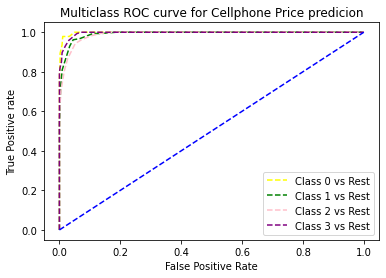

In [95]:
# plot of ROC curve
plt.plot(fpr[0], tpr[0], linestyle='--',color='yellow', label='Class 0 vs Rest') 
plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Rest') 
plt.plot(fpr[2], tpr[2], linestyle='--',color='pink', label='Class 2 vs Rest')
plt.plot(fpr[3], tpr[3], linestyle='--',color='purple', label='Class 3 vs Rest')
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.title('Multiclass ROC curve for Cellphone Price predicion') 
plt.xlabel('False Positive Rate') 
plt.ylabel('True Positive rate') 
plt.legend(loc='best') 
plt.savefig('Multiclass ROC',dpi=500);     


##### We predicted Cell phone price with 92.5 accuracy.

##### Saving Model to disk

In [96]:
import pickle

In [97]:
pickle.dump(model_knn, open('cell_model.pkl','wb'))

##### Load model to compair result

In [98]:
model = pickle.load(open('cell_model.pkl','rb'))

##### Predicting model

In [99]:
print(model.predict([[1911,1,1,36,108,8,3,868,1632,3057,9,1]]))

[3]


In [100]:
print(model.predict([[842,1,0,7,188,2,2,20,756,2549,9,7]]))

[1]
